In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Extracting Data 

In [2]:
data=pd.read_csv('car.csv')
data.index=range(0,len(data))
data

,buying,maint,doors,persons,lug_boot,safety,accept
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


### Preprocessing Data

In [3]:
data['doors'].dtype

dtype('O')

In [4]:
(data['accept']).value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: accept, dtype: int64

Here as the data given was in String format but models don't work on that so we need to update it to int.

In [5]:
dt={'vhigh':3,'high':2,'med':1,'low':0,'small':0,'big':2,'unacc':0,'acc':1,'good':2,'vgood':3,'more':1,'5more':1}
data.replace(dt,inplace=True)
data

,buying,maint,doors,persons,lug_boot,safety,accept
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0
...,...,...,...,...,...,...,...
1723,0,0,1,1,1,1,2
1724,0,0,1,1,1,2,3
1725,0,0,1,1,2,0,0
1726,0,0,1,1,2,1,2


Here we can see that all of them now has been modified into int datatype

In [6]:
data = data.astype(int)
data.dtypes

buying      int32
maint       int32
doors       int32
persons     int32
lug_boot    int32
safety      int32
accept      int32
dtype: object

### Analyzing Dataset

<AxesSubplot:>

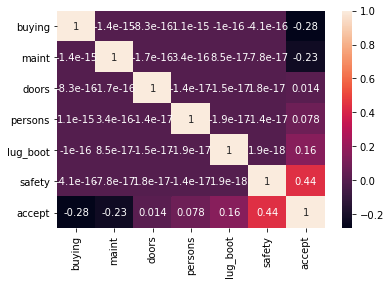

In [7]:
corr=data.corr()
sns.heatmap(corr,annot=True)

The below shown two graph depicts the relation between all the attributes with target variable 

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


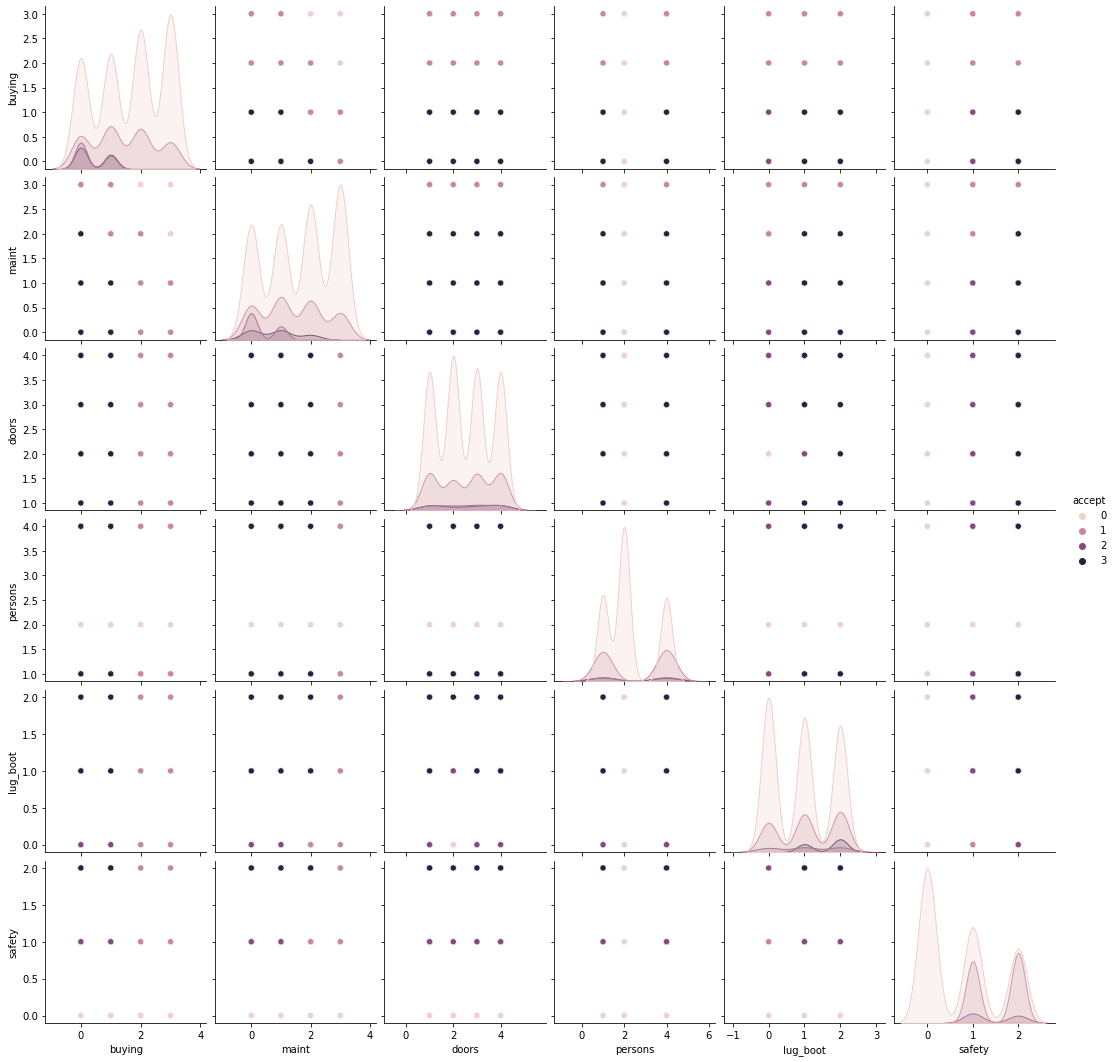

In [8]:
sns.pairplot(data,hue='accept')

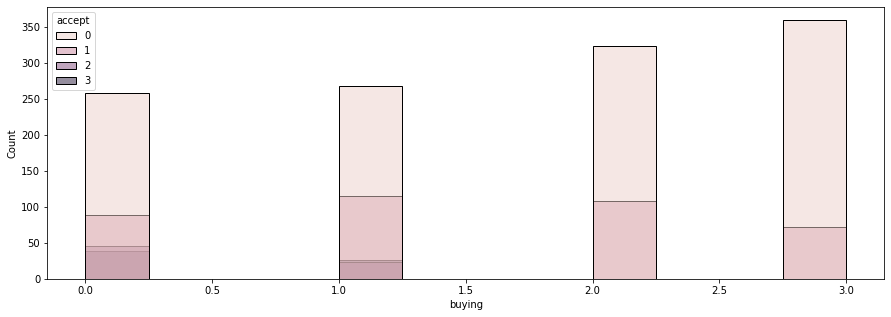

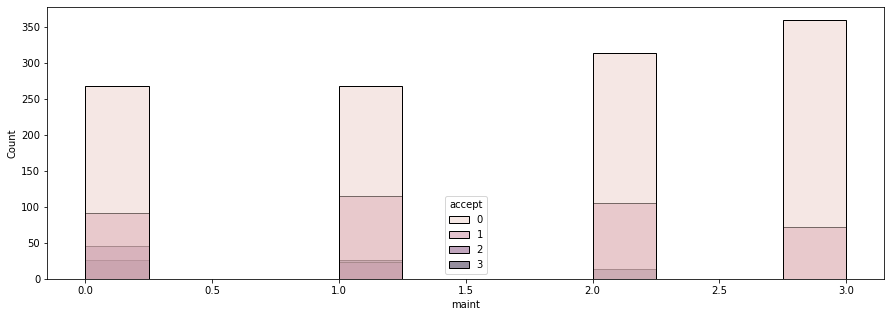

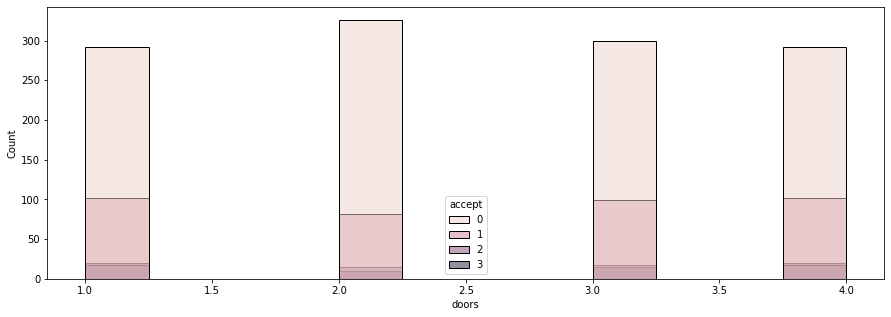

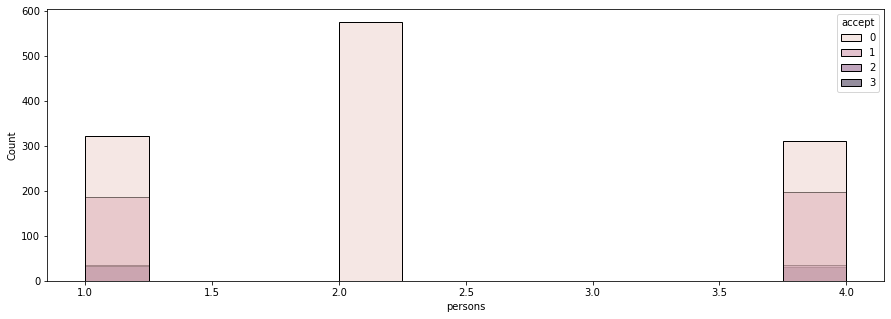

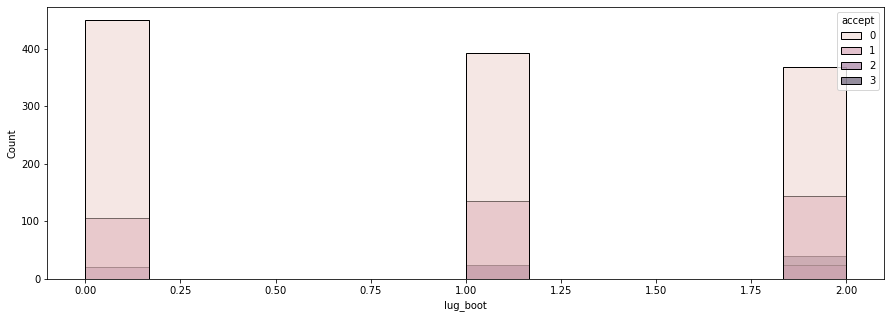

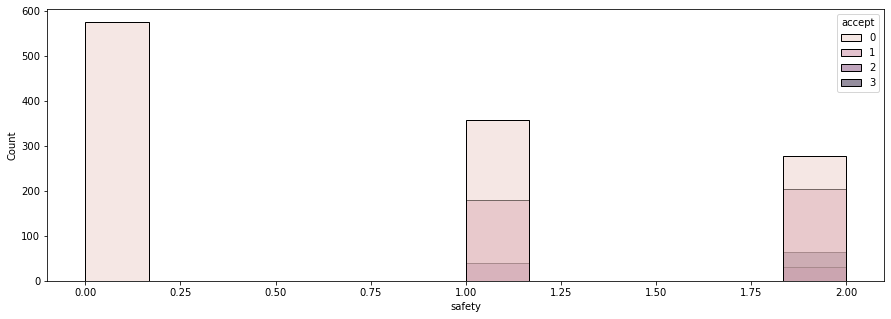

In [9]:
colums=['buying','maint','doors','persons','lug_boot','safety']
for col in colums:
    plt.figure(figsize=(15,5))
    sns.histplot(data=data,x=data[col],hue=data['accept'])

In [10]:
X=data.drop(columns=['accept'])
y=pd.DataFrame(data['accept'])
X,y

(      buying  maint  doors  persons  lug_boot  safety
 0          3      3      2        2         0       0
 1          3      3      2        2         0       1
 2          3      3      2        2         0       2
 3          3      3      2        2         1       0
 4          3      3      2        2         1       1
 ...      ...    ...    ...      ...       ...     ...
 1723       0      0      1        1         1       1
 1724       0      0      1        1         1       2
 1725       0      0      1        1         2       0
 1726       0      0      1        1         2       1
 1727       0      0      1        1         2       2
 
 [1728 rows x 6 columns],
       accept
 0          0
 1          0
 2          0
 3          0
 4          0
 ...      ...
 1723       2
 1724       3
 1725       0
 1726       2
 1727       3
 
 [1728 rows x 1 columns])

Splitting of Data into Training and Testing

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
len(X_train),len(X_test)

(1382, 346)

### Model Training and Testing

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix
def getAcc(y_test,y_pred):
    cm=confusion_matrix(y_test,y_pred)
    acc=accuracy_score(y_test,y_pred)
    return cm,acc

### Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

<ipython-input-13-949bde083c40>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, random_state=0)

In [14]:
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

0.6791907514450867

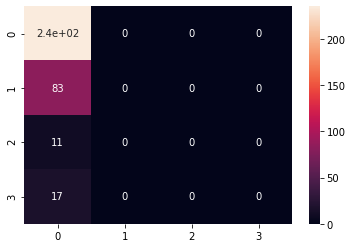

In [15]:
cm,acc=getAcc(y_test,y_pred)
sns.heatmap(cm,annot=True)
acc

## KNN Classifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [17]:
y_pred=knn.predict(X_test)

0.9075144508670521

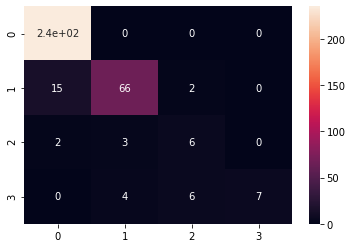

In [18]:
cm,ac=getAcc(y_test,y_pred)
sns.heatmap(cm,annot=True)
ac

# Decision Tree 

In [19]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

0.9479768786127167

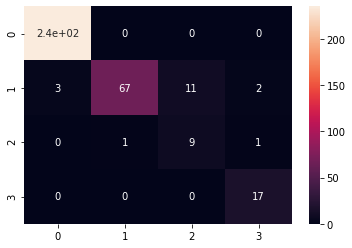

In [20]:
clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
cm,ac=getAcc(y_test,y_pred)
sns.heatmap(cm,annot=True)
ac

## SVC

In [21]:
from sklearn.svm import SVC
svc=SVC( kernel='rbf',C=1)
svc.fit(X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=1)

In [22]:
y_pred=svc.predict(X_test)

0.9132947976878613

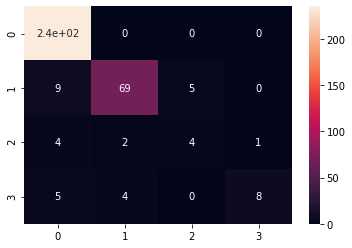

In [23]:
cm,ac=getAcc(y_test,y_pred)
sns.heatmap(cm,annot=True)
ac

## Naive Bayes

In [24]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MultinomialNB()

In [25]:
y_pred=mnb.predict(X_test)

0.6791907514450867

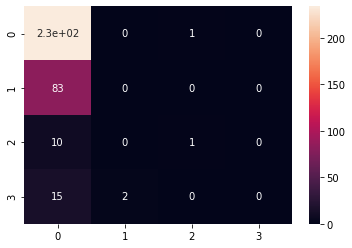

In [26]:
cm,acc=getAcc(y_test,y_pred)
sns.heatmap(cm,annot=True)
acc

Tuninng Parameters for Decision Tree as it performs better among all of the above mentioned 


In [27]:
from sklearn.model_selection import GridSearchCV
clf = tree.DecisionTreeClassifier()
params = {'criterion':['gini'],'max_depth':list(range(2,20))}
gsv=GridSearchCV(clf,params)

In [28]:
gsv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19]})

In [29]:
gsv.best_params_

{'criterion': 'gini', 'max_depth': 14}

0.9450867052023122

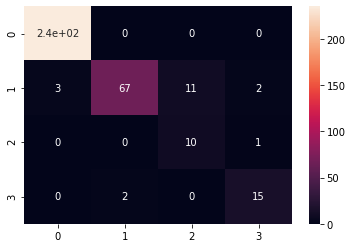

In [30]:
y_pred=gsv.predict(X_test)
cm,acc=getAcc(y_test,y_pred)
sns.heatmap(cm,annot=True)
acc

Till here without any change in dataset we have done prediction and the output with various classifier is shown below.
<img src='table_1.png' width='400px' height='150px'></img>

### Handling Bias Data

From the dataset it came into light that 70% of data was belonging to class 0 and rest to other 3 classes so sampling the data to see if accuracy can be improved or not

In [31]:
X,y

(      buying  maint  doors  persons  lug_boot  safety
 0          3      3      2        2         0       0
 1          3      3      2        2         0       1
 2          3      3      2        2         0       2
 3          3      3      2        2         1       0
 4          3      3      2        2         1       1
 ...      ...    ...    ...      ...       ...     ...
 1723       0      0      1        1         1       1
 1724       0      0      1        1         1       2
 1725       0      0      1        1         2       0
 1726       0      0      1        1         2       1
 1727       0      0      1        1         2       2
 
 [1728 rows x 6 columns],
       accept
 0          0
 1          0
 2          0
 3          0
 4          0
 ...      ...
 1723       2
 1724       3
 1725       0
 1726       2
 1727       3
 
 [1728 rows x 1 columns])

In [32]:
# len(data[data['accept']==0]),len(data[data['accept']==1]),len(data[data['accept']==2]),len(data[data['accept']==3])

## Using Manual Approach

In [33]:
df_0=data[data['accept']==0]
df_1=data[data['accept']==1]
df_2=data[data['accept']==2]
df_3=data[data['accept']==3]
len(df_0),len(df_1),len(df_2),len(df_3)

(1210, 384, 69, 65)

In [34]:
data1=data
data1

,buying,maint,doors,persons,lug_boot,safety,accept
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0
...,...,...,...,...,...,...,...
1723,0,0,1,1,1,1,2
1724,0,0,1,1,1,2,3
1725,0,0,1,1,2,0,0
1726,0,0,1,1,2,1,2


In [35]:
for i in range(1):
    df_1=pd.concat([df_1,df_1.sample(len(df_1))],axis=0)
len(df_1)

768

In [36]:
for i in range(3):
    df_2=pd.concat([df_2,df_2.sample(len(df_2))],axis=0)
len(df_2)

552

In [37]:
for i in range(3):
    df_3=pd.concat([df_3,df_3.sample(len(df_3))],axis=0)
len(df_3)

520

In [38]:
data1=pd.concat([data1,df_2,df_3],axis=0)
data1

,buying,maint,doors,persons,lug_boot,safety,accept
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0
...,...,...,...,...,...,...,...
1454,0,2,3,1,1,2,3
1718,0,0,1,4,2,2,3
1691,0,0,4,4,2,2,3
1268,1,0,4,1,2,2,3


In [39]:
X1=data1.drop(columns=['accept'])
y1=pd.DataFrame(data1['accept'])
X1,y1

(      buying  maint  doors  persons  lug_boot  safety
 0          3      3      2        2         0       0
 1          3      3      2        2         0       1
 2          3      3      2        2         0       2
 3          3      3      2        2         1       0
 4          3      3      2        2         1       1
 ...      ...    ...    ...      ...       ...     ...
 1454       0      2      3        1         1       2
 1718       0      0      1        4         2       2
 1691       0      0      4        4         2       2
 1268       1      0      4        1         2       2
 1430       0      2      2        1         2       2
 
 [2800 rows x 6 columns],
       accept
 0          0
 1          0
 2          0
 3          0
 4          0
 ...      ...
 1454       3
 1718       3
 1691       3
 1268       3
 1430       3
 
 [2800 rows x 1 columns])

In [40]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.2,random_state=42)
len(X_train1),len(X_test1)

(2240, 560)

0.9785714285714285

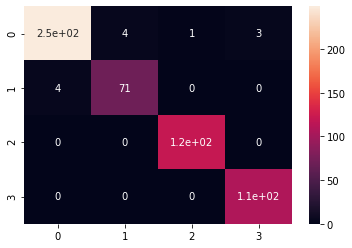

In [41]:
clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train1,y_train1)
y_pred1=clf.predict(X_test1)
cm,ac=getAcc(y_test1,y_pred1)
sns.heatmap(cm,annot=True)
ac

So here we have analyzed using Decision Tree only as it was given the highest accuracy without any modification.
To get better idea about parameters we have used GridSearchCV to get best out of them. 

### Using SMOTE

In [42]:
def getSplitting(X1,y1,m):
    X1,y1=m.fit_resample(X1,y1)
    return train_test_split(X1,y1,test_size=0.2)

Using BorderLine SMOTE

<AxesSubplot:ylabel='Count'>

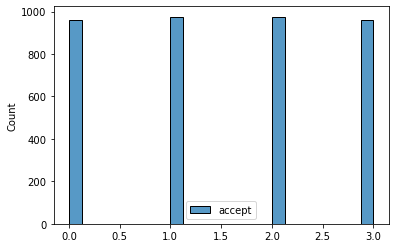

In [43]:
from imblearn.over_sampling import BorderlineSMOTE
bsm=BorderlineSMOTE()
X_train1,X_test1,y_train1,y_test1=getSplitting(X,y,bsm)
sns.histplot(y_train1)

0.9504132231404959

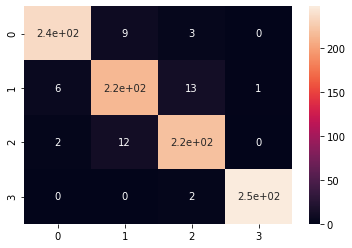

In [44]:
gsv.fit(X_train1,y_train1)
y_pred1=gsv.predict(X_test1)
cm,acc=getAcc(y_test1,y_pred1)
sns.heatmap(cm,annot=True)
acc

Using RandomOverSampler

<AxesSubplot:ylabel='Count'>

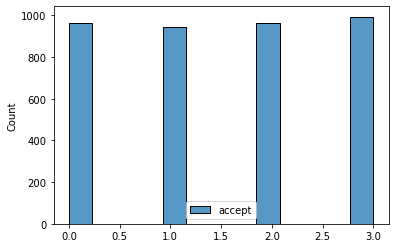

In [45]:
from imblearn.over_sampling import RandomOverSampler
rsm=RandomOverSampler()
X_train1,X_test1,y_train1,y_test1=getSplitting(X,y,rsm)
sns.histplot(y_train1)

0.9907024793388429

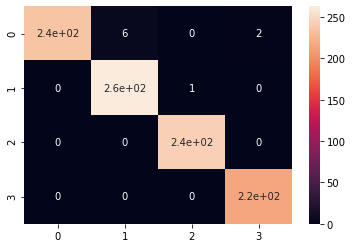

In [46]:
gsv.fit(X_train1,y_train1)
y_pred1=gsv.predict(X_test1)
cm,acc=getAcc(y_test1,y_pred1)
sns.heatmap(cm,annot=True)
acc

As we have seen that the Maximum accuracy comes from the combination of Decision Tree with Random OverSampler we would be predicting the new instances with the same.

In [47]:
from imblearn.over_sampling import RandomOverSampler

In [48]:
def fin_model(X_new):
    rsm=RandomOverSampler()
    X_train1,X_test1,y_train1,y_test1=getSplitting(X,y,rsm)
    gsv.fit(X_train1,y_train1)
    return gsv.predict(X_new)

### User Program (Use These one for manual entry of data and for .csv format use below these one)

In [49]:

lst1=["Buying","Maint","Doors","Persons","Lug_boot","Safety"]
lst=[
    {
        "0":"low",
        "1":"med",
        "2":"high",
        "3":"vhigh"
    },
    {
        "0":"low",
        "1":"med",
        "2":"high",
        "3":"vhigh"
    },
    {
        "0":"0-4",
        "1":"5more"
    },
    {
        "0":"0-4",
        "1":"more"
    },
    {
        "0":"small",
        "1":"med",
        "2":"big"
    },
    {
        "0":"low",
        "1":"med",
        "2":"high"
    }
]

In [50]:
a=[]
for i in range(0,len(lst)):
    dc=lst[i]
    print(lst1[i])
    for key in dc:
        print(key,dc[key])
    inp=int(input("Enter Choice :"))
    a.append(inp)
a1=[]
a1.append(a)
x1_test = pd.DataFrame(a1,columns=lst1)
x1_test

Buying
0 low
1 med
2 high
3 vhigh
Enter Choice :0
Maint
0 low
1 med
2 high
3 vhigh
Enter Choice :3
Doors
0 0-4
1 5more
Enter Choice :1
Persons
0 0-4
1 more
Enter Choice :1
Lug_boot
0 small
1 med
2 big
Enter Choice :2
Safety
0 low
1 med
2 high
Enter Choice :2


,Buying,Maint,Doors,Persons,Lug_boot,Safety
0,0,3,1,1,2,2


In [51]:
fin_model(x1_test)

array([1])

So Here we have predicted a whole new instance from user for a single instance

### For .csv use mentioned below code

Note replace your csv file with the one having name test.csv in the required folder

In [52]:
test=pd.read_csv('test.csv')
transfer={'vhigh':3,'high':2,'med':1,'low':0,'small':0,'big':2,'unacc':0,'acc':1,'good':2,'vgood':3,'more':1,'5more':1}
test.replace(transfer,inplace=True)
test

,buying,maint,doors,persons,lug_boot,safety,accept
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0


In [53]:
X_test1=test.drop(columns=['accept'])
y_test1=pd.DataFrame(test['accept'])
X_test1,y_test1

(   buying  maint  doors  persons  lug_boot  safety
 0       3      3      2        2         0       0
 1       3      3      2        2         0       1,
    accept
 0       0
 1       0)

In [54]:
y_test_pred=fin_model(X_test1)
cm,ac=getAcc(y_test_pred,y_test1)
print(ac)

1.0


### In-short Description of what is performed in above all cells

<ul>
<li>First of all after extracting and preprocessing the data from the given dataset we have trained the dataset on all the possible types of models</li>
<li>After the testing and looking at the accuracy obtained by training on different models we have decided to use Decision Tree which was performing best among all</li> 
    <li>While analyzing the dataset we found that their exist data-imbalance problem in the given dataset</li>
    <li>So we have applied various SMOOTE techniques for overcoming accuracy which lead us to get accuracy upt0 99%</li>
    <li>For the testing purpose we have provided two approaches either enter data manually which is only for one instance or replace your csv file with the one mentioned in the folder as per the instruction mentioned above. </li>
</ul>

<h3>Conclusion/Inference</h3>

<p>From performing above ML classification we learned about different classifiers.Tackling of different problems like Imbalance
dataset, Non-numerical value, outliers was all explored during these course of action.The most difficult problem we found was limited amount of data which is not feasible in real world scenarios but to deal with it was a great exposure. Lastly by exploring various models we got more clarity about which sets of algorithm to be used in various scenarios.</p>

In [55]:
pip install -U notebook-as-pdf

Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


SyntaxError: invalid syntax (<ipython-input-59-ceaf7de91661>, line 1)